# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
import json
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print("weather_api_key :"+weather_api_key)


weather_api_key :03b60fde30c9d85fce22c2e8bc12a8c2


### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print("City: "+city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = weather_api_key
appid = wkey
settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
      
    print("City Name : "+city)
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    #city_url = url + "&q=" + cities[i]
    
    city_url = url + "&q=" + urllib.request.pathname2url(city)
        
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    #print(city_url)
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather = requests.get(city_url).json()

        
                      
        #city_lat = city_weather["coord"]["lat"]
        #city_lng = city_weather["coord"]["lon"]
        #city_max_temp = city_weather["main"]["temp_max"]
        #city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        #city_date = city_weather["dt"]
        
        city_lat = city_weather["coord"]["lat"]
        #print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        #print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
        #print(city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
        #print(city_humidity)
        city_clouds = city_weather["clouds"]["all"]
        #print(city_clouds)
        city_wind = city_weather["wind"]["speed"]
        #print(city_wind)
        city_country = city_weather["sys"]["country"]
        #print(city_country)
        city_date = city_weather["dt"]
        
        #print(city_date)
        
        
         # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
City Name : rikitea
Processing Record 1 of Set 1 | rikitea
City Name : yubari
Processing Record 2 of Set 1 | yubari
City Name : asau
Processing Record 3 of Set 1 | asau
City Name : ushuaia
Processing Record 4 of Set 1 | ushuaia
City Name : bauta
Processing Record 5 of Set 1 | bauta
City Name : hithadhoo
Processing Record 6 of Set 1 | hithadhoo
City Name : tuatapere
Processing Record 7 of Set 1 | tuatapere
City Name : mataura
Processing Record 8 of Set 1 | mataura
City Name : bredasdorp
Processing Record 9 of Set 1 | bredasdorp
City Name : hasaki
Processing Record 10 of Set 1 | hasaki
City Name : prainha
Processing Record 11 of Set 1 | prainha
City Name : lima
Processing Record 12 of Set 1 | lima
City Name : shingu
Processing Record 13 of Set 1 | shingu
City Name : santa cruz del sur
Processing Record 14 of Set 1 | santa cruz del sur
City Name : vaini
Processing Record 15 of Set 1 | vaini
City Name : te anau
Processing Record 1

City Name : castro
Processing Record 28 of Set 3 | castro
City Name : northam
Processing Record 29 of Set 3 | northam
City Name : houston
Processing Record 30 of Set 3 | houston
City Name : vestmannaeyjar
Processing Record 31 of Set 3 | vestmannaeyjar
City Name : aklavik
Processing Record 32 of Set 3 | aklavik
City Name : cayenne
Processing Record 33 of Set 3 | cayenne
City Name : maroantsetra
Processing Record 34 of Set 3 | maroantsetra
City Name : baykit
Processing Record 35 of Set 3 | baykit
City Name : attawapiskat
Processing Record 36 of Set 3 | attawapiskat
City not found. Skipping...
City Name : solnechnyy
Processing Record 37 of Set 3 | solnechnyy
City Name : mar del plata
Processing Record 38 of Set 3 | mar del plata
City Name : praia da vitoria
Processing Record 39 of Set 3 | praia da vitoria
City Name : nirasaki
Processing Record 40 of Set 3 | nirasaki
City Name : damoh
Processing Record 41 of Set 3 | damoh
City Name : hilo
Processing Record 42 of Set 3 | hilo
City Name : ka

City Name : kambove
Processing Record 3 of Set 6 | kambove
City Name : bedford
Processing Record 4 of Set 6 | bedford
City Name : tsihombe
Processing Record 5 of Set 6 | tsihombe
City not found. Skipping...
City Name : cidreira
Processing Record 6 of Set 6 | cidreira
City Name : altamira
Processing Record 7 of Set 6 | altamira
City Name : ojinaga
Processing Record 8 of Set 6 | ojinaga
City Name : bourail
Processing Record 9 of Set 6 | bourail
City Name : saskylakh
Processing Record 10 of Set 6 | saskylakh
City Name : lodja
Processing Record 11 of Set 6 | lodja
City Name : garowe
Processing Record 12 of Set 6 | garowe
City Name : jacksonville
Processing Record 13 of Set 6 | jacksonville
City Name : tasiilaq
Processing Record 14 of Set 6 | tasiilaq
City Name : najran
Processing Record 15 of Set 6 | najran
City Name : port lincoln
Processing Record 16 of Set 6 | port lincoln
City Name : ondorhaan
Processing Record 17 of Set 6 | ondorhaan
City not found. Skipping...
City Name : palabuhanra

City Name : beyla
Processing Record 32 of Set 8 | beyla
City Name : illela
Processing Record 33 of Set 8 | illela
City Name : fort nelson
Processing Record 34 of Set 8 | fort nelson
City Name : khonsa
Processing Record 35 of Set 8 | khonsa
City Name : lujiang
Processing Record 36 of Set 8 | lujiang
City Name : olafsvik
Processing Record 37 of Set 8 | olafsvik
City Name : faanui
Processing Record 38 of Set 8 | faanui
City Name : luwuk
Processing Record 39 of Set 8 | luwuk
City Name : nouadhibou
Processing Record 40 of Set 8 | nouadhibou
City Name : carinhanha
Processing Record 41 of Set 8 | carinhanha
City Name : log
Processing Record 42 of Set 8 | log
City Name : kavaratti
Processing Record 43 of Set 8 | kavaratti
City Name : sechura
Processing Record 44 of Set 8 | sechura
City Name : aksarka
Processing Record 45 of Set 8 | aksarka
City Name : pokhara
Processing Record 46 of Set 8 | pokhara
City Name : isla mujeres
Processing Record 47 of Set 8 | isla mujeres
City Name : vuktyl
Process

City Name : mago
Processing Record 9 of Set 11 | mago
City Name : esperance
Processing Record 10 of Set 11 | esperance
City Name : nnewi
Processing Record 11 of Set 11 | nnewi
City Name : redlands
Processing Record 12 of Set 11 | redlands
City Name : vaitape
Processing Record 13 of Set 11 | vaitape
City Name : mount pleasant
Processing Record 14 of Set 11 | mount pleasant
City Name : bada
Processing Record 15 of Set 11 | bada
City Name : mahibadhoo
Processing Record 16 of Set 11 | mahibadhoo
City Name : zhanaozen
Processing Record 17 of Set 11 | zhanaozen
City Name : dubrovka
Processing Record 18 of Set 11 | dubrovka
City Name : verkhnetulomskiy
Processing Record 19 of Set 11 | verkhnetulomskiy
City Name : toliary
Processing Record 20 of Set 11 | toliary
City not found. Skipping...
City Name : ust-nera
Processing Record 21 of Set 11 | ust-nera
City Name : hobyo
Processing Record 22 of Set 11 | hobyo
City Name : novyy urengoy
Processing Record 23 of Set 11 | novyy urengoy
City Name : ba

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv",encoding="utf-8",index=False)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,78.33,76,100,12.10,PF,1682064780
1,yubari,43.0378,141.9578,48.49,52,60,17.72,JP,1682064877
2,asau,46.4333,26.4000,51.28,80,100,6.42,RO,1682064836
3,ushuaia,-54.8000,-68.3000,38.86,81,75,27.63,AR,1682064686
4,bauta,22.9828,-82.5464,67.98,88,0,2.30,CU,1682064878


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,78.33,76,100,12.10,PF,1682064780
1,yubari,43.0378,141.9578,48.49,52,60,17.72,JP,1682064877
2,asau,46.4333,26.4000,51.28,80,100,6.42,RO,1682064836
3,ushuaia,-54.8000,-68.3000,38.86,81,75,27.63,AR,1682064686
4,bauta,22.9828,-82.5464,67.98,88,0,2.30,CU,1682064878


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

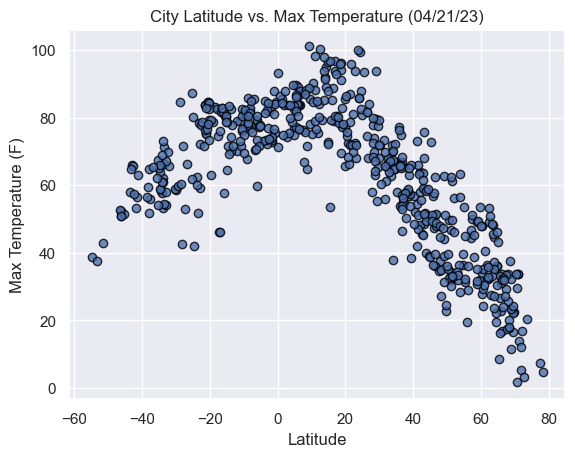

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

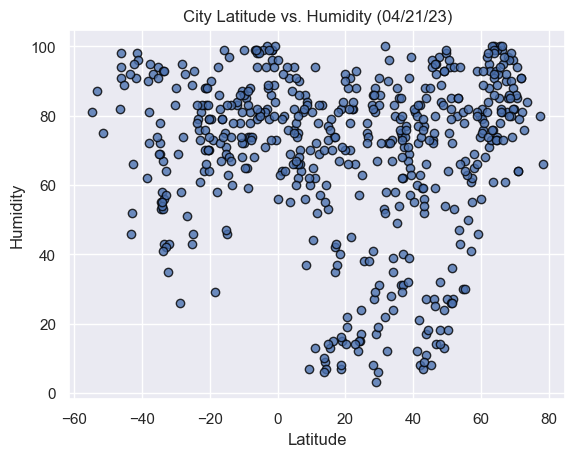

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

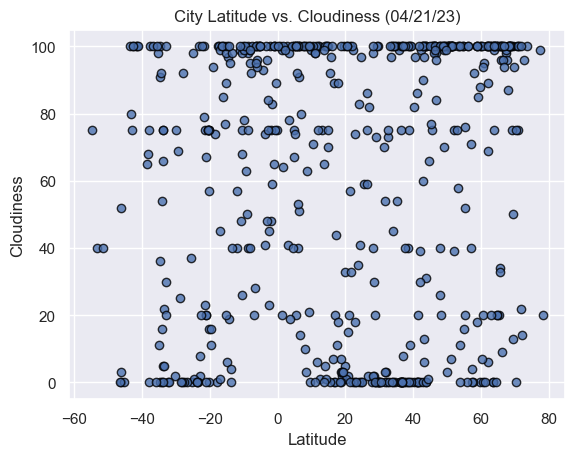

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

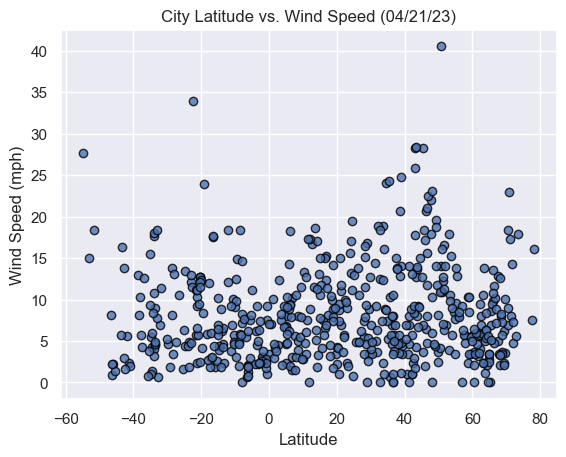

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = (x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yubari,43.0378,141.9578,48.49,52,60,17.72,JP,1682064877
2,asau,46.4333,26.4000,51.28,80,100,6.42,RO,1682064836
4,bauta,22.9828,-82.5464,67.98,88,0,2.30,CU,1682064878
9,hasaki,35.7333,140.8333,77.29,85,100,10.31,JP,1682064805
12,shingu,33.7333,135.9833,69.87,73,100,2.30,JP,1682064646


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,78.33,76,100,12.10,PF,1682064780
3,ushuaia,-54.8000,-68.3000,38.86,81,75,27.63,AR,1682064686
5,hithadhoo,-0.6000,73.0833,84.69,73,89,7.49,MV,1682064825
6,tuatapere,-46.1333,167.6833,51.01,91,3,2.17,NZ,1682064785
7,mataura,-46.1927,168.8643,52.48,98,0,0.92,NZ,1682064787


###  Temperature vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** There is a very strong negative (inverse) relationship between Temperature and Latitude in the Northern Hemisphare.Temperature goes down relative faster with an increase in Latitude.

The r-value is: City_ID
1      43.0378
2      46.4333
4      22.9828
9      35.7333
12     33.7333
        ...   
542    66.9395
544    59.8518
545    56.1667
547     5.3848
548    23.2167
Name: Latitude, Length: 379, dtype: float64


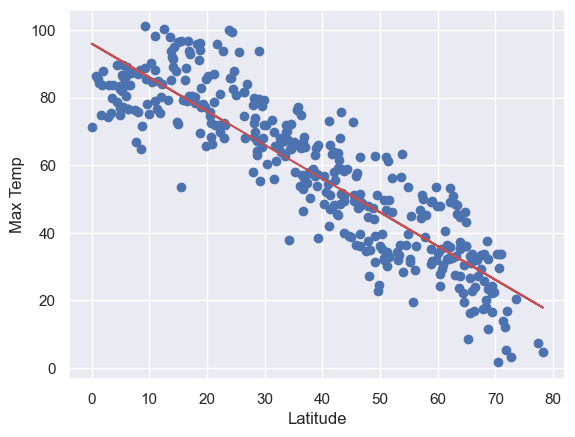

In [38]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: City_ID
0     -23.1203
3     -54.8000
5      -0.6000
6     -46.1333
7     -46.1927
        ...   
533   -35.7167
535   -15.0969
539   -13.6333
543    -6.2167
546   -20.5667
Name: Latitude, Length: 170, dtype: float64


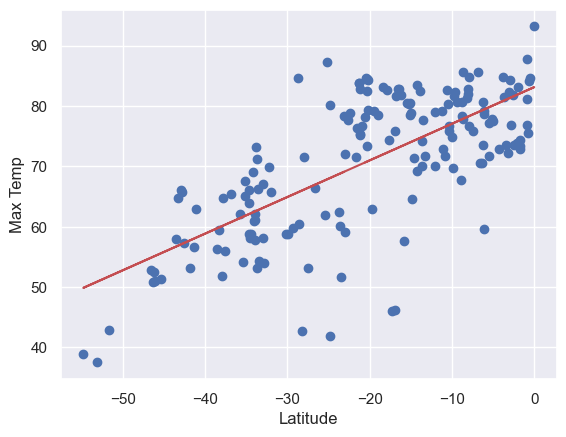

In [39]:
# Linear regression on Sourthern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (10, -30))

In [ ]:
Discussion about the linear relationship **: There is a fairly positive relationship between Temperature and Latitude in the 
Southern Hemisphere. Temperature moderately goes up with an increase in Latitude.

The r-value is: City_ID
1      43.0378
2      46.4333
4      22.9828
9      35.7333
12     33.7333
        ...   
542    66.9395
544    59.8518
545    56.1667
547     5.3848
548    23.2167
Name: Latitude, Length: 379, dtype: float64


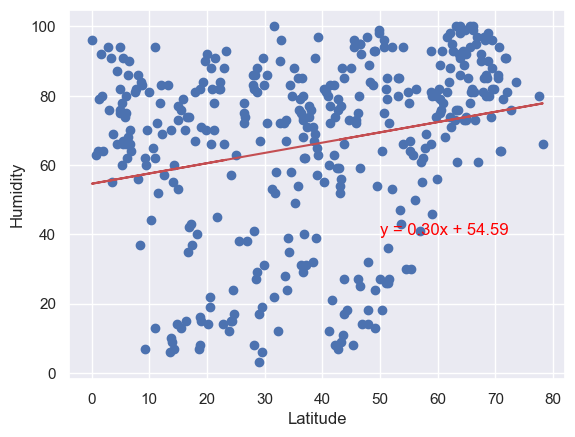

In [54]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

In [ ]:
**Discussion about the linear relationship:** There is relatively low level of positive relationship between Humidity and 
Latitude in the Northern Hemisphere. Temperature slightly goes up with increase in Latitude.

The r-value is: City_ID
0     -23.1203
3     -54.8000
5      -0.6000
6     -46.1333
7     -46.1927
        ...   
533   -35.7167
535   -15.0969
539   -13.6333
543    -6.2167
546   -20.5667
Name: Latitude, Length: 170, dtype: float64


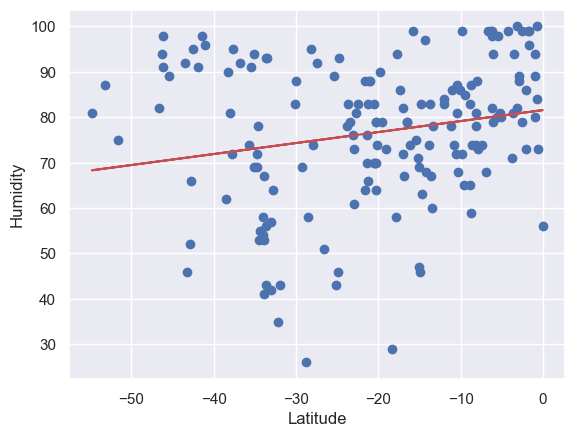

In [53]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (50, 40))

**Discussion about the linear relationship:** There is relatively low positive relationship between Humidity and Latitude in the Southern Hemisphere. Temperature slightly goes up with increase in Latitude. The positive relationship is bit weaker in the Southern Hemisphere than the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: City_ID
1      43.0378
2      46.4333
4      22.9828
9      35.7333
12     33.7333
        ...   
542    66.9395
544    59.8518
545    56.1667
547     5.3848
548    23.2167
Name: Latitude, Length: 379, dtype: float64


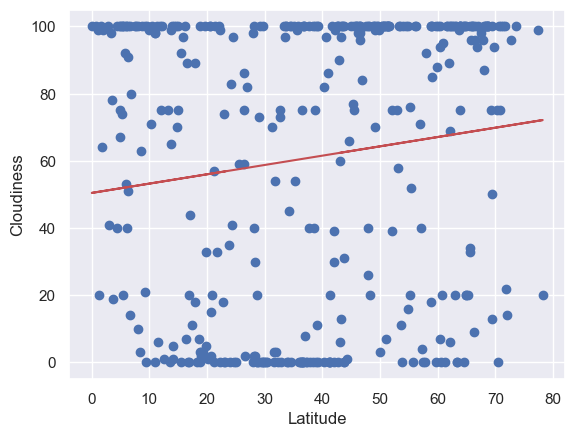

In [49]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (-50, 40))

In [ ]:
Discussion about the linear relationship:** There is a low level of  positive relationship between Cloudiness and Latitude
in the Northern Hemisphere. Clouddiness slightly goes up with increase in Latitude.

The r-value is: City_ID
0     -23.1203
3     -54.8000
5      -0.6000
6     -46.1333
7     -46.1927
        ...   
533   -35.7167
535   -15.0969
539   -13.6333
543    -6.2167
546   -20.5667
Name: Latitude, Length: 170, dtype: float64


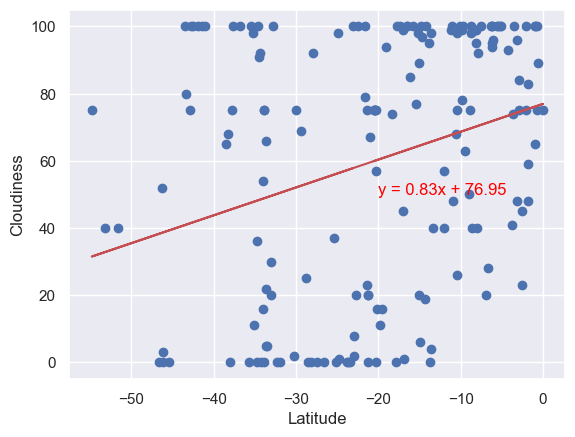

In [50]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-20, 50))

**Discussion about the linear relationship:** There is also a low level of  positive relationship between Cloudiness and Latitude in the Southern Hemisphere. Cloudiness slightly goes up with an increase in Latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: City_ID
1      43.0378
2      46.4333
4      22.9828
9      35.7333
12     33.7333
        ...   
542    66.9395
544    59.8518
545    56.1667
547     5.3848
548    23.2167
Name: Latitude, Length: 379, dtype: float64


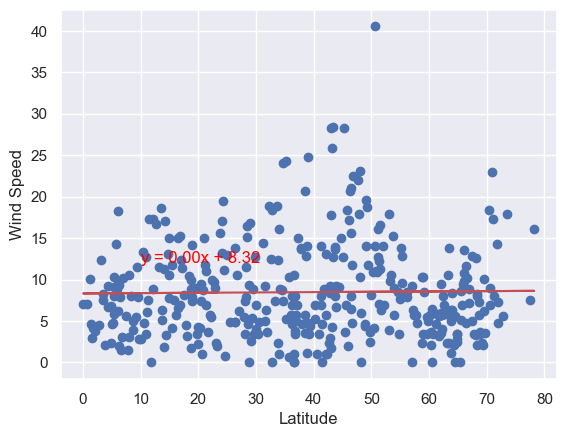

In [46]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

In [ ]:
**Discussion about the linear relationship:** There no is distinguishable relationship between Wind Speed and Latitude in 
the Northern Hemisphere. 

The r-value is: City_ID
0     -23.1203
3     -54.8000
5      -0.6000
6     -46.1333
7     -46.1927
        ...   
533   -35.7167
535   -15.0969
539   -13.6333
543    -6.2167
546   -20.5667
Name: Latitude, Length: 170, dtype: float64


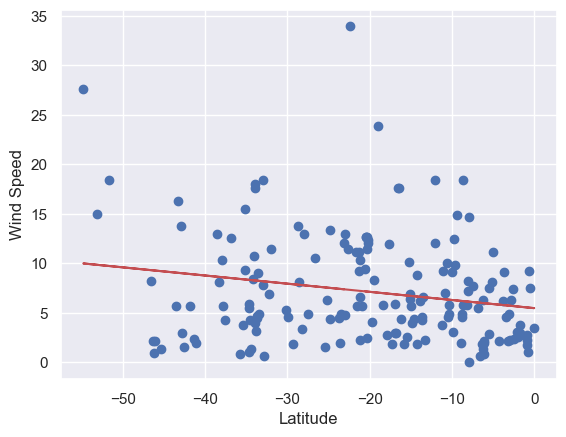

In [47]:
# Southern  Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (10, 12))

**Discussion about the linear relationship:** There is a low level of negative relationship between Wind Speed and Latitude in the Souththern Hemisphere. Cloudiness slightly goes down with an increase in Latitude. 